# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 100 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
import pickle
import urllib.request

# URL for the CIFAR-100 Python version dataset
url = 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'
filename = 'cifar-100-python.tar.gz'

urllib.request.urlretrieve(url, filename)

import tarfile
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()

with open('cifar-100-python/meta', 'rb') as f:
    meta = pickle.load(f, encoding='bytes')

fine_label_names = meta[b'fine_label_names']
fine_label_names = [label.decode('utf-8') for label in fine_label_names]


Training set shape: (50000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)

Training set number: 50000, images resolution (32, 32), images number of color 3
Training set labels numbers: (50000, 1)
Testing set number: 10000, images resolution (32, 32), images number of color 3
Testing set labels numbers: (10000, 1)

Image dimensions (32, 32, 3)

Unick number of classes[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


'orange'

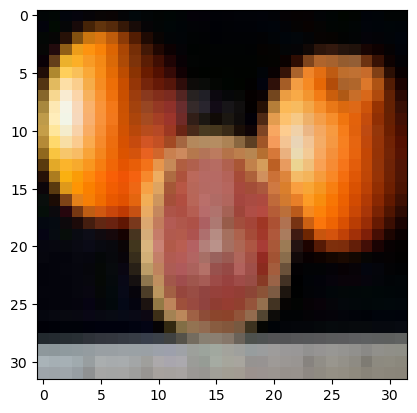

In [3]:
print(f"\nTraining set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

print(f"\nTraining set number: {x_train.shape[0]}, images resolution {x_train.shape[1:3]}, images number of color {x_train.shape[3]}")
print(f"Training set labels numbers: {y_train.shape}")
print(f"Testing set number: {x_test.shape[0]}, images resolution {x_test.shape[1:3]}, images number of color {x_test.shape[3]}")
print(f"Testing set labels numbers: {y_test.shape}")

print(f"\nImage dimensions {x_train.shape[1:]}")

print(f"\nUnick number of classes{np.unique(y_test)}")


plt.imshow(x_train[299]); fine_label_names[y_train[299][0]]

'cattle'

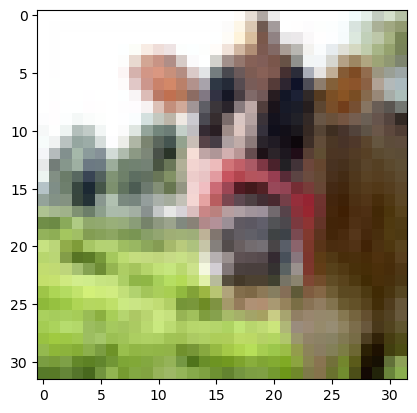

In [4]:

plt.imshow(x_train[0]); fine_label_names[y_train[0][0]]

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split

y_train_preproc = to_categorical(y_train)
y_test_preproc = to_categorical(y_test)
print(f"Train labels before one_hot {y_train[:5]}")
print(f"Train labels after one_hot {y_train_preproc[:5]}")

x_train_preproc = normalize(x_train)
x_test_preproc = normalize(x_test)
print(f"Train labels before one_hot {x_train[1][1]}")
print(f"Train labels after one_hot {x_train_preproc[1][1]}")

x_train_preproc, x_valid, y_train_preproc, y_valid = train_test_split( x_train_preproc, y_train_preproc, test_size=0.2, random_state=42)

Train labels before one_hot [[19]
 [29]
 [ 0]
 [11]
 [ 1]]
Train labels after one_hot [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
len(x_train_preproc), len(y_train_preproc), len(x_valid), len(y_valid)

(40000, 40000, 10000, 10000)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_base = Sequential([
    Conv2D( filters=64, kernel_size=(4, 4), strides=2, padding="valid" ),
    MaxPooling2D(),
    Conv2D( filters=128, kernel_size=(4, 4) ),
    MaxPooling2D(),
    Flatten(),
    Dense( 128, activation='relu' ),
    Dense( 100, activation='softmax' )
])


In [11]:

model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 64)        3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> We did One-Hot representation of label that one of the reason for useing categorical_crossentropy. The categorical cross-entropy loss function measures the dissimilarity between the predicted probability distribution (output from softmax) and the actual distribution (the ground truth label).
- <b>Optimizer:</b> Adam is widely used optimizers for deep learning, including image classification. It is automatically adjusts learning rates during training. So we don't need to warry about chossing learning_rate hyperparametr.

In [9]:
from keras import optimizers

model_base.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','mse'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

I chose 15 epochs because the baseline model is simple and has relatively few parameters, so it is likely to reach its optimal performance quickly.

In [10]:
history = model_base.fit( x_train_preproc, y_train_preproc, epochs=15, batch_size=32, validation_data=(x_valid, y_valid) )

Epoch 1/15
1250/1250 [==============================] - 21s 16ms/step - loss: 4.0612 - accuracy: 0.0828 - mse: 0.0097 - val_loss: 3.7458 - val_accuracy: 0.1272 - val_mse: 0.0095
Epoch 2/15
1250/1250 [==============================] - 19s 15ms/step - loss: 3.6534 - accuracy: 0.1483 - mse: 0.0094 - val_loss: 3.5593 - val_accuracy: 0.1638 - val_mse: 0.0093
Epoch 3/15
1250/1250 [==============================] - 17s 13ms/step - loss: 3.4554 - accuracy: 0.1805 - mse: 0.0092 - val_loss: 3.5020 - val_accuracy: 0.1727 - val_mse: 0.0092
Epoch 4/15
1250/1250 [==============================] - 17s 14ms/step - loss: 3.2957 - accuracy: 0.2105 - mse: 0.0090 - val_loss: 3.3752 - val_accuracy: 0.1973 - val_mse: 0.0091
Epoch 5/15
1250/1250 [==============================] - 19s 15ms/step - loss: 3.1565 - accuracy: 0.2362 - mse: 0.0088 - val_loss: 3.3434 - val_accuracy: 0.2086 - val_mse: 0.0090
Epoch 6/15
1250/1250 [==============================] - 19s 15ms/step - loss: 3.0252 - accuracy: 0.2610 - mse:

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 21.4%
- <b>Other metric:</b> Precision, recall.
- <b>Reason for selection:</b> Precision and recall are highly informative and easily interpretable metrics. Analyzing their values can be crucial for performance of classification models in sensitive applications like healthcare, where the consequences of errors can be significant.
- <b>Value of metric:</b> Macro average precision 0.21 , macro average recall 0.23.
- <b>Interpretation of metric value:</b> The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, accuracy_score

pred = model_base.predict(x_test_preproc)

print("Final test MSE: %0.3f" % mean_squared_error(pred, y_test_preproc))
print("Final test MAE: %0.3f" % mean_absolute_error(pred, y_test_preproc))   
print("Final test accuracy: %0.3f" % accuracy_score(pred.argmax(axis=1), y_test_preproc.argmax(axis=1)))

313/313 [==============================] - 2s 7ms/step
Final test MSE: 0.009
Final test MAE: 0.017
Final test accuracy: 0.225


In [14]:
print(classification_report(pred.argmax(axis=1), y_test_preproc.argmax(axis=1), target_names=fine_label_names))

               precision    recall  f1-score   support

        apple       0.50      0.59      0.54        85
aquarium_fish       0.25      0.28      0.27        88
         baby       0.15      0.27      0.19        56
         bear       0.03      0.05      0.04        62
       beaver       0.07      0.07      0.07        99
          bed       0.18      0.15      0.16       122
          bee       0.22      0.16      0.19       136
       beetle       0.24      0.31      0.27        78
      bicycle       0.11      0.17      0.13        65
       bottle       0.39      0.42      0.40        93
         bowl       0.13      0.10      0.12       126
          boy       0.15      0.21      0.17        73
       bridge       0.04      0.17      0.06        24
          bus       0.14      0.16      0.15        88
    butterfly       0.20      0.18      0.19       112
        camel       0.07      0.11      0.09        63
          can       0.22      0.20      0.21       110
       ca

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

At the 5th epoch, the validation accuracy nearly plateaued while the training accuracy continued to improve and slightly dropped towards the end. Given that our model is relatively simple, overfitting is not a primary concern. Instead, it's more likely that the model is struggling to generalize patterns due to its simplicity.

The results from the baseline model suggest that we need to enhance the model to better learn more complex patterns. 
The probabilities indicate that, even in true positive cases, the model is not confident in its predictions, suggesting it may not be capturing the underlying features effectively.

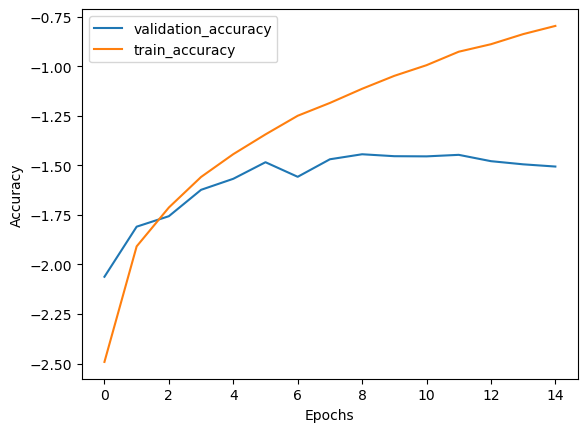

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.log(history.history["val_accuracy"]), label="validation_accuracy")
plt.plot(np.log(history.history["accuracy"]), label="train_accuracy")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

missclasified count 7746, correctly predicted 2254


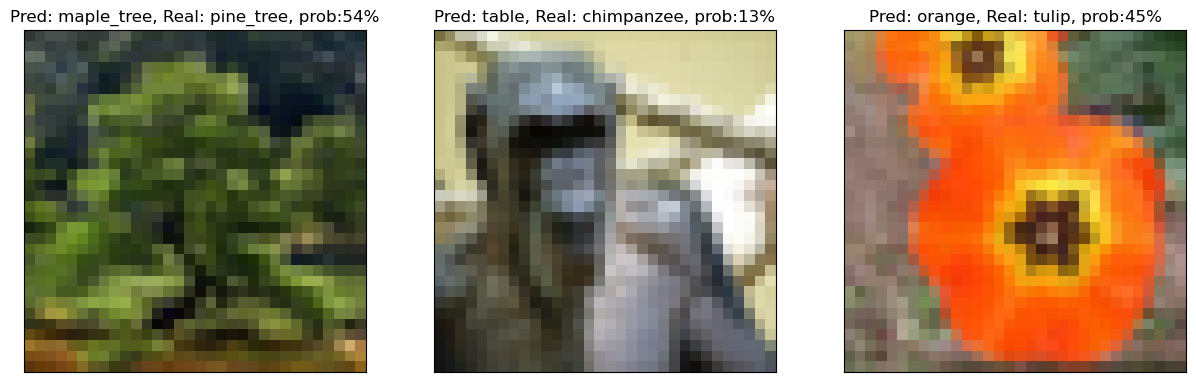

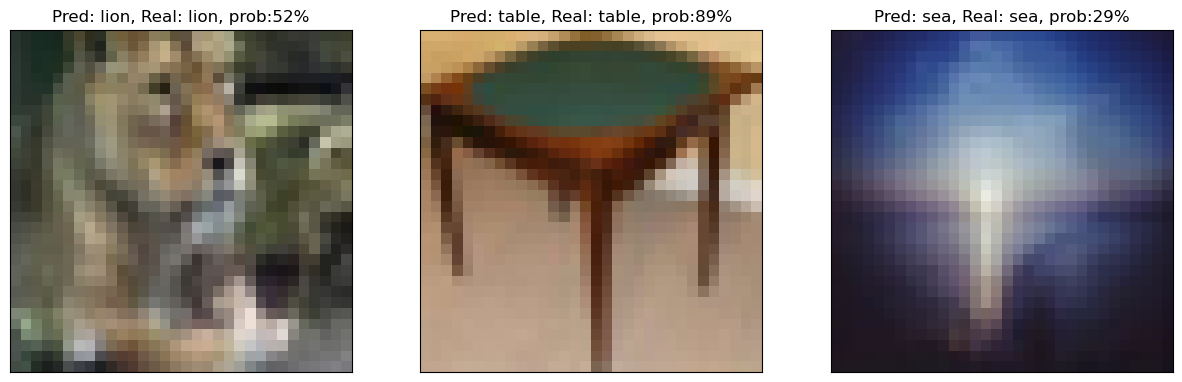

In [156]:
miss_class = np.where( pred.argmax(axis=1) != y_test_preproc.argmax(axis=1) )[0]
correct_class = np.where( pred.argmax(axis=1) == y_test_preproc.argmax(axis=1) )[0]
print (f"missclasified count {len(miss_class)}, correctly predicted {len(correct_class)}")


def plot_3_img( est_class ):
    random_indices = np.random.choice(len(est_class), 3, replace=False)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_test[est_class[random_indices[i]]], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f"Pred: {fine_label_names[pred[est_class[random_indices[i]]].argmax(axis=0)]}, Real: {fine_label_names[y_test[est_class[random_indices[i]]][0]]}, prob:{round(pred[est_class[random_indices[i]]].max()*100)}%")

        # Removing axis labels
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

plot_3_img( miss_class )
plot_3_img( correct_class )

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

I used series of convolutional layers with increasing filter sizes and smaller kernel sizes to allow the model to learn more complex patterns. I applied Dropout to prevent overfitting by randomly turning off some neurons during training. I also included a BatchNormalization layer to normalize the output of the previous layer, which helps in speeding up the training process and stabilizing the learning by reducing internal covariate shift. 

Nadam optimazer was choosen instead of Adam to reduce computation time.

In [165]:
from tensorflow.keras.layers import Dropout, AveragePooling2D, BatchNormalization

model = Sequential([
    Conv2D( filters=64, kernel_size=(3, 3), activation='relu' ),
    MaxPooling2D(pool_size=(2, 2)), 
    BatchNormalization(),  
    Conv2D( filters=64, kernel_size=(3, 3), activation='relu' ),
    AveragePooling2D(pool_size=(2, 2)),      
    BatchNormalization(),  
    Conv2D( filters=128, kernel_size=(3, 3), activation='relu' ),
    Conv2D( filters=256, kernel_size=(3, 3), activation='relu' ),    
    Conv2D( filters=512, kernel_size=(2, 2), activation='relu' ),     
    Dropout(0.4),
    Flatten(),    
    BatchNormalization(),
    Dense( 512, activation='relu' ),    
    Dense( 256, activation='relu' ),
    Dense( 100, activation='softmax' )
])

In [168]:
from tensorflow.keras.layers import Dropout, AveragePooling2D, BatchNormalization

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    BatchNormalization(),
    Dense( 512, activation='relu' ),  
    Dropout(0.5),
    Dense( 100, activation='softmax' )
])

In [169]:

model.compile( loss='categorical_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

history = model.fit( x_train_preproc, y_train_preproc, epochs=20, batch_size=32, validation_data=(x_valid, y_valid) )

Epoch 1/20
1250/1250 [==============================] - 134s 106ms/step - loss: 4.3101 - accuracy: 0.0576 - val_loss: 4.2544 - val_accuracy: 0.0624
Epoch 2/20
1250/1250 [==============================] - 124s 99ms/step - loss: 3.9727 - accuracy: 0.0892 - val_loss: 4.1673 - val_accuracy: 0.0711
Epoch 3/20
1250/1250 [==============================] - 117s 94ms/step - loss: 3.8552 - accuracy: 0.1129 - val_loss: 4.9750 - val_accuracy: 0.0506
Epoch 4/20
1250/1250 [==============================] - 119s 95ms/step - loss: 3.7742 - accuracy: 0.1245 - val_loss: 3.9389 - val_accuracy: 0.0978
Epoch 5/20
1250/1250 [==============================] - 119s 95ms/step - loss: 3.7275 - accuracy: 0.1330 - val_loss: 4.8807 - val_accuracy: 0.0737
Epoch 6/20
1250/1250 [==============================] - 124s 99ms/step - loss: 3.6577 - accuracy: 0.1408 - val_loss: 8.4806 - val_accuracy: 0.0381
Epoch 7/20
1250/1250 [==============================] - 120s 96ms/step - loss: 3.5855 - accuracy: 0.1535 - val_loss: 

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [172]:
pred_better_mod = model.predict(x_test_preproc)

print("Final test MSE: %0.3f" % mean_squared_error(pred_better_mod, y_test_preproc))
print("Final test MAE: %0.3f" % mean_absolute_error(pred_better_mod, y_test_preproc))   
print("Final test accuracy: %0.3f" % accuracy_score(pred_better_mod.argmax(axis=1), y_test_preproc.argmax(axis=1)))

313/313 [==============================] - 9s 28ms/step
Final test MSE: 0.009
Final test MAE: 0.017
Final test accuracy: 0.213


In [173]:
print(classification_report(pred_better_mod.argmax(axis=1), y_test_preproc.argmax(axis=1), target_names=fine_label_names))

               precision    recall  f1-score   support

        apple       0.61      0.60      0.61       101
aquarium_fish       0.35      0.25      0.29       139
         baby       0.15      0.23      0.18        66
         bear       0.02      0.03      0.02        74
       beaver       0.07      0.10      0.08        69
          bed       0.09      0.21      0.13        42
          bee       0.28      0.20      0.24       138
       beetle       0.23      0.43      0.30        53
      bicycle       0.17      0.20      0.19        83
       bottle       0.36      0.54      0.43        67
         bowl       0.09      0.20      0.12        44
          boy       0.12      0.22      0.15        55
       bridge       0.15      0.18      0.16        83
          bus       0.05      0.16      0.08        32
    butterfly       0.18      0.20      0.19        92
        camel       0.10      0.23      0.14        44
          can       0.12      0.55      0.20        22
       ca

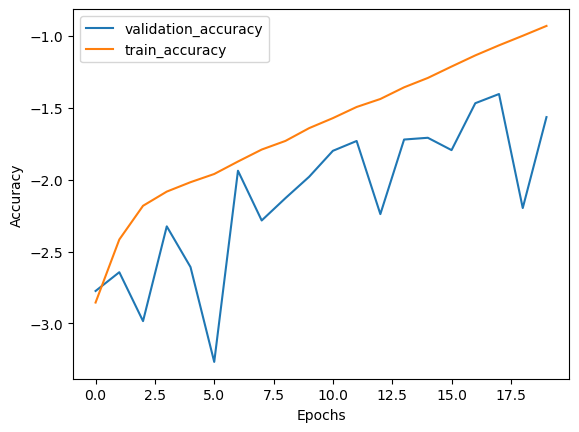

In [174]:
plt.plot(np.log(history.history["val_accuracy"]), label="validation_accuracy")
plt.plot(np.log(history.history["accuracy"]), label="train_accuracy")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

missclasified count 7867, correctly predicted 2133


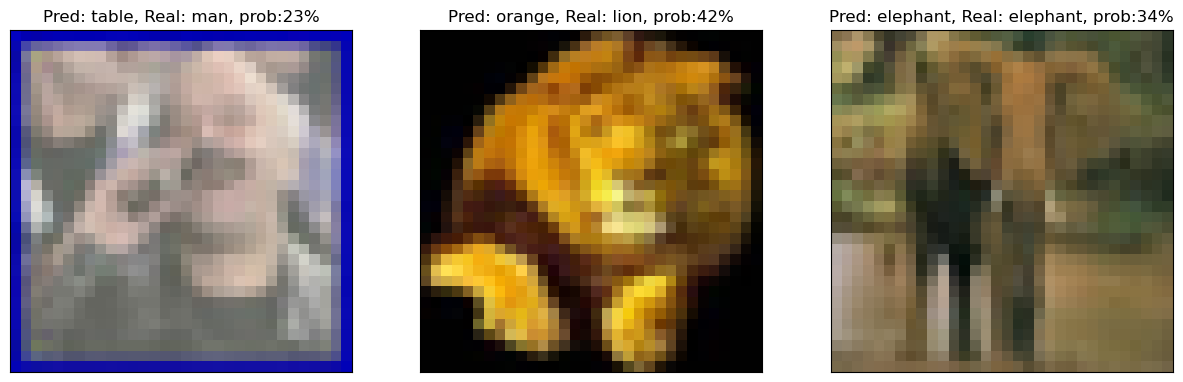

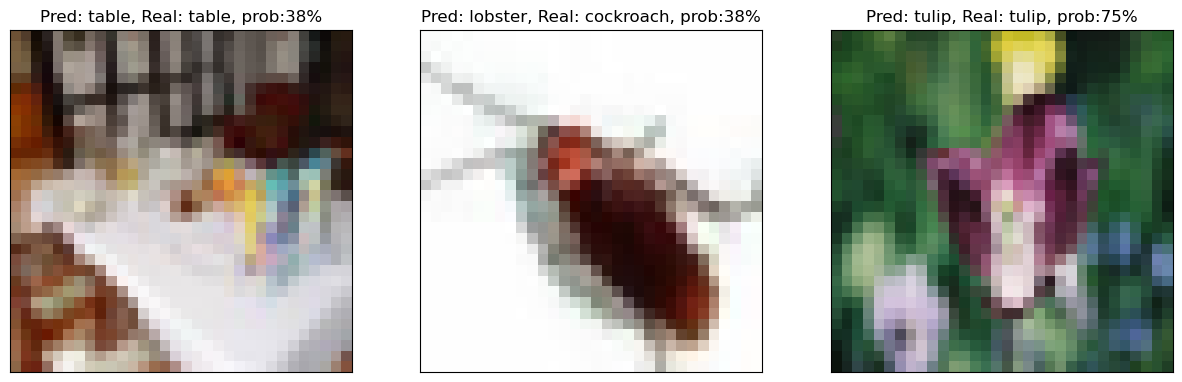

In [175]:
miss_class_better_mod = np.where( pred_better_mod.argmax(axis=1) != y_test_preproc.argmax(axis=1) )[0]
correct_class_better_mod = np.where( pred_better_mod.argmax(axis=1) == y_test_preproc.argmax(axis=1) )[0]
print (f"missclasified count {len(miss_class_better_mod)}, correctly predicted {len(correct_class_better_mod)}")

plot_3_img( miss_class_better_mod )
plot_3_img( correct_class_better_mod )

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

The improved model has many more layers and parameters, but it didn't perform significantly better. The overall performance is similar to the baseline, though the validation dynamics differ. The baseline model plateaued after 5-6 epochs, while the updated model shows gradual improvement over time. This suggests that learning more complex patterns may require significantly more epochs in our case.

There is no evidence of overfitting, as the model is still far from state-of-the-art, and many parameters can be adjusted to explore how training outcomes might change. Therefore, there is definitely room for improvement.

I plan to decrease the number of parameters and increase the model's depth (number of layers). Additionally, I will try computing in grayscale instead of RGB to reduce computation time, which should allow for more epochs and potentially better performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.